# COMP 7150 Assignment 5 SOLUTION

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

This dataset was collected from pregnant women.  Each row corresponds to a person.  An Outcome of 0 means the person is not diagnosed with diabetes.  An Outcome of 1 means the person is diagnosed with diabetes.

**Each problem is worth 20 points.**

In [1]:
import pandas

diabetes = pandas.read_csv('../Datasets/diabetes.csv')

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

**Problem 1**

Suppose that you want to compare these two methods of cross validation: shuffle and split, and 12-fold cross validation.

With shuffle and split, you will probably want to specify the same number test data points and training data points as 12-fold cross validation.

How many test data points do you have to set in shuffle split to ensure that the two methods have the same number of test data points (and consequently train data points)?



ANSWER:

12-fold cross validation has 12 iterations. In each iteration, the data is split into 12 equal parts.  One part is used for testing; the other 11 parts are used for training.

If we want to use the same amount of data for testing with Shuffle Split, we can specify the amount of test data to be 1/12 of the total number of data points.

---

**Problem 2**

Sklearn's KFold cross validation has a parameter called "shuffle".  If this parameter is set to True, the data is shuffled randomly before the cross validation begins.

Use sklearn's KFold and cross_validate to implement a function that randomly perform 5-Fold cross validation 5 times on given a model and data, as specified below.

ANSWER:

We will create a new KFold validator (with shuffle set to True) in each of the five times.



In [36]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
iris = pandas.read_csv('../Datasets/iris.csv')
X = iris.drop(columns=['Species'])
y = iris['Species']
model = KNeighborsClassifier()
res = cross_validate(model, X, y, scoring='accuracy', 
                     cv=KFold(n_splits=3,shuffle=False))

# This is why we should shuffle the data before using KFold.
res['test_score'].mean()

0.0

In [63]:
from sklearn.model_selection import cross_validate, KFold

#
# Input: model, features (X), target (y)
# Output: average f1 score of the cross validation
#
def five_five_fold_cross_validate(model, X, y, scoring='f1'):
    results = []
    for i in range(5):
        validator = KFold(n_splits=5, shuffle=True)
        r = cross_validate(model, X, y, scoring=scoring, cv=validator)
        # results.extend(list(r['test_score']))
        results.append( r['test_score'].mean())
    return sum(results)/len(results)

---
**Problem 3**

Validate a 10-nearest neighbor model on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y, and any two features for X.  Try to get as high scores as you can by choose two good features. 

ANSWER:

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
y = diabetes['Outcome']

In [41]:
diabetes.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
736,0,126,86,27,120,27.4,0.515,21,0
297,0,126,84,29,215,30.7,0.520,24,0


In [42]:
X = diabetes[['Glucose','BMI']]
five_five_fold_cross_validate(model, X, y)

0.5450299818384139

---
**Problem 4**

Validate a 10-nearest neighbor model on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y.

For X, choose the first two principal components obtained by PCA.  To train PCA, use all features of diabetes.

ANSWER:

In [45]:
from sklearn.decomposition import PCA
Xall = diabetes.drop(columns=['Outcome'])
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xall)

In [47]:
model = KNeighborsClassifier(n_neighbors=10)
y = diabetes['Outcome']
five_five_fold_cross_validate(model, Xpca, y)

0.5397699856027334

In [49]:
import seaborn
from matplotlib import pyplot
diabetes[['pca1','pca2']] = Xpca

In [50]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pca1,pca2
0,6,148,72,35,0,33.6,0.627,50,1,-75.714655,-35.950783
1,1,85,66,29,0,26.6,0.351,31,0,-82.358268,28.908213
2,8,183,64,0,0,23.3,0.672,32,1,-74.630643,-67.906496
3,1,89,66,23,94,28.1,0.167,21,0,11.077423,34.898486
4,0,137,40,35,168,43.1,2.288,33,1,89.743788,-2.746937


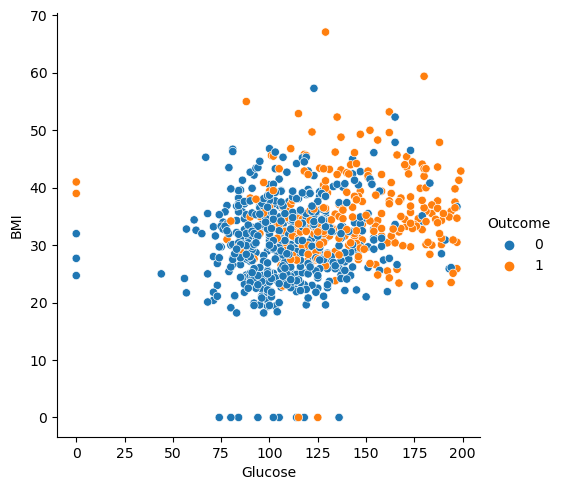

In [52]:
seaborn.relplot(data=diabetes, x='Glucose', y='BMI', hue='Outcome')

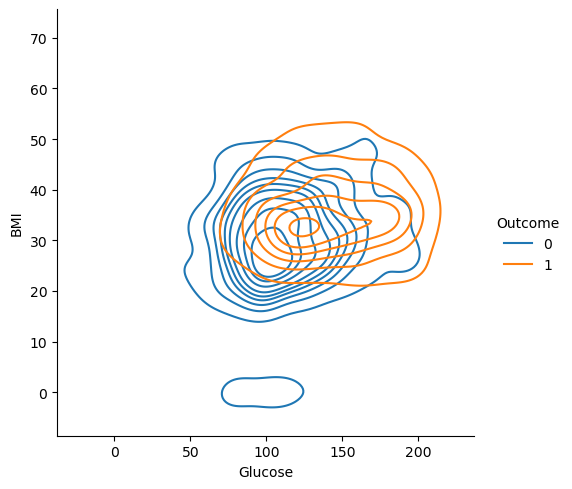

In [55]:
seaborn.displot(data=diabetes, x='Glucose', y='BMI', hue='Outcome', kind='kde')
pyplot.show()

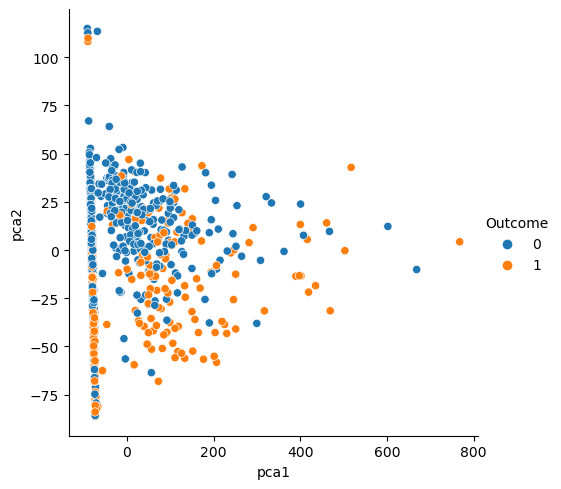

In [56]:
seaborn.relplot(data=diabetes, x='pca1', y='pca2', hue='Outcome')
pyplot.show()

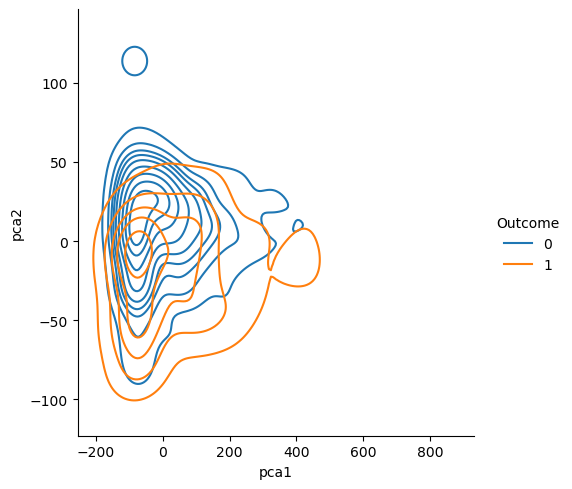

In [57]:
seaborn.displot(data=diabetes, x='pca1', y='pca2', hue='Outcome', kind='kde')
pyplot.show()

In [58]:
pca.fit(Xpca,y)

PCA(n_components=2)

In [59]:
pca.explained_variance_ratio_

array([0.93517697, 0.06482303])

Summary:
+ Using something like chi2 or f_test to select features is called "feature selection".
+ Using something like pca to get new features is called "feature extraction".


---
**Problem 5**

Validate a most-frequent dummy classifier on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y.

For X, choose the first two principal components obtained by PCA.  To train PCA, use all features of diabetes.

ANSWER:

In [80]:
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xall)
baseline = DummyClassifier(strategy='most_frequent')
five_five_fold_cross_validate(baseline, Xpca, y, scoring='f1')

0.0